In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pulp

file_name = 'take_home/land_parcels.shp'

# Defining GeoDataFrames
parcels = gpd.read_file(file_name)
projected = parcels.to_crs('epsg:3347')

# Data summary
poly_num = len(parcels)
print("There are {0} polygons.".format(poly_num))

area_min = min(projected.area)
area_max = max(projected.area)
area_avg = sum(projected.area)/poly_num
s = "The minimum area is {0}, the maximum area is {1}, and the average (mean) area is {2}."
print(s.format(area_min, area_max, area_avg))

c_stores = parcels["carbon_sto"]
costs = parcels["cost"]
carbon_range = max(c_stores) - min(c_stores)
cost_range = max(costs) - min(costs)
print("The carbon_store range is {0} ({1} - {2})".format(carbon_range, max(c_stores), min(c_stores)))
print("The cost range is {0} ({1} - {2})".format(cost_range, max(costs), min(costs)))

There are 100 polygons.
The minimum area is 37378247.23691204, the maximum area is 132095542.8630858, and the average (mean) area is 80540032.88468249.
The carbon_store range is 89.82436510414392 (99.8608996768998 - 10.036534572755878)
The cost range is 4457.482333726783 (4982.434015347925 - 524.9516816211429)


0 polygon(s) were removed for having area less than 23356646.448837966


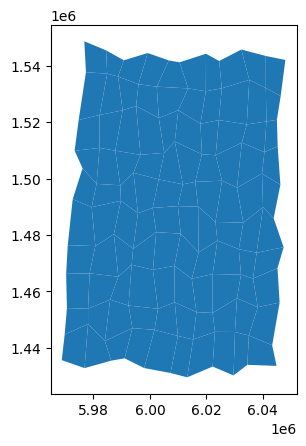

In [ ]:
# Filtering outliers

# Defining an outlier as being more than 3 standard deviations below from the mean
area_std_deviation = np.std(np.array(projected.area))
area_threshold = area_avg - 3*area_std_deviation

def filter_areas(gdf, threshold):
    '''
    returns a GeoDataFrame of the entries of the GeoDataFrame gdf
    where the polygons with area less than threshold are removed.
    '''
    df_lst = gdf.values
    filtered_lst = []

    # Removing polygons with areas too small
    for shape in df_lst:
        if shape[3].area >= threshold:
            filtered_lst.append(shape)
    
    # Creating new GeoDataFrame
    new = pd.DataFrame(np.array(filtered_lst),
                       columns=['parcel_id', 'carbon_sto', 'cost', 'geometry'])
    return new.set_geometry("geometry")

filtered_gdf = filter_areas(projected.copy(deep = True), area_threshold)
diff = poly_num - len(filtered_gdf)
print("{0} polygon(s) were removed for having area less than {1}".format(diff, area_threshold))

filtered_gdf.plot()
plt.show()

In [ ]:
# Finding adjacencies
def adjacencies(gdf):
    '''
    returns a dictionary of the adjacency of the polygons of GeoDataFrame gdf. Each key is
    the parcel_id of the selected polygon, and the values are a list the parcel_ids of the
    polygons adjacent to it.
    '''
    df_lst = gdf.values
    adj_mat = {}
    for shape in df_lst:
        id = shape[0]
        adj_mat[id] = []
        poly1 = shape[3]
        edges = poly1.boundary.coords
        for other in df_lst:
            other_id = other[0]
            poly2 = other[3]
            if id != other_id:
                adj = False
                other_edges = poly2.boundary.coords
                # Comparing edges by comparing vertex coordinates
                for i in range(len(edges)-1):
                    for j in range(len(other_edges)-1):
                        if (edges[i] == other_edges[j] and edges[i+1] == other_edges[j+1])\
                            or (edges[i] == other_edges[j+1] and edges[i+1] == other_edges[j]):
                            adj = True
                if adj:
                    adj_mat[id].append(other_id)
    return adj_mat

adj_dict = adjacencies(filtered_gdf)
print(adj_dict)

{0: [1, 10], 1: [0, 2, 11], 2: [1, 3, 12], 3: [2, 4, 13], 4: [3, 5, 14], 5: [4, 6, 15], 6: [5, 7, 16], 7: [6, 8, 17], 8: [7, 9, 18], 9: [8, 19], 10: [0, 11, 20], 11: [1, 10, 12, 21], 12: [2, 11, 13, 22], 13: [3, 12, 14, 23], 14: [4, 13, 15, 24], 15: [5, 14, 16, 25], 16: [6, 15, 17, 26], 17: [7, 16, 18, 27], 18: [8, 17, 19, 28], 19: [9, 18, 29], 20: [10, 21, 30], 21: [11, 20, 22, 31], 22: [12, 21, 23, 32], 23: [13, 22, 24, 33], 24: [14, 23, 25, 34], 25: [15, 24, 26, 35], 26: [16, 25, 27, 36], 27: [17, 26, 28, 37], 28: [18, 27, 29, 38], 29: [19, 28, 39], 30: [20, 31, 40], 31: [21, 30, 32, 41], 32: [22, 31, 33, 42], 33: [23, 32, 34, 43], 34: [24, 33, 35, 44], 35: [25, 34, 36, 45], 36: [26, 35, 37, 46], 37: [27, 36, 38, 47], 38: [28, 37, 39, 48], 39: [29, 38, 49], 40: [30, 41, 50], 41: [31, 40, 42, 51], 42: [32, 41, 43, 52], 43: [33, 42, 44, 53], 44: [34, 43, 45, 54], 45: [35, 44, 46, 55], 46: [36, 45, 47, 56], 47: [37, 46, 48, 57], 48: [38, 47, 49, 58], 49: [39, 48, 59], 50: [40, 51, 60],

c:\Users\tavin\project\project_env\Lib\site-packages\pulp\pulp.py:1423: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


parcel_00
parcel_02
parcel_04
parcel_06
parcel_09
parcel_11
parcel_13
parcel_15
parcel_18
parcel_20
parcel_22
parcel_26
parcel_29
parcel_31
parcel_33
parcel_35
parcel_37
parcel_40
parcel_42
parcel_44
parcel_46
parcel_48
parcel_51
parcel_53
parcel_55
parcel_57
parcel_59
parcel_60
parcel_62
parcel_64
parcel_66
parcel_68
parcel_71
parcel_73
parcel_75
parcel_77
parcel_79
parcel_80
parcel_82
parcel_84
parcel_86
parcel_88
parcel_91
parcel_93
parcel_95
parcel_97
parcel_99
47 polygons were selected
The total carbon store of the subset is 2841.3958959119273. The total available carbon store is 5605.510677653775
The total cost of the subset is 139711.66828591342. The total cost of all polygons is 281926.16986972134
The total area of the subset is 3846690368.495276. The total available area is 8054003288.468249


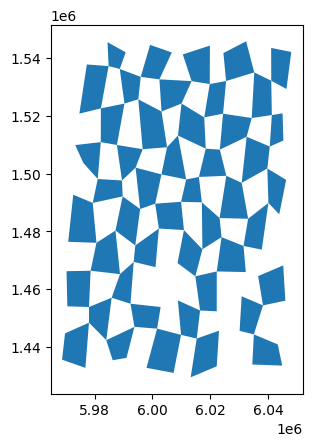

In [89]:
# Optimization problem

df_lst = filtered_gdf.values
carbon_dict = {}
cost_dict = {}
area_dict = {}
ids = []
for shape in df_lst:
    ids.append(shape[0])
    ## keys made to be strings to keep numerical order
    carbon_dict[str(shape[0]).zfill(2)] = shape[1]
    cost_dict[str(shape[0]).zfill(2)] = shape[2]
    area_dict[str(shape[0]).zfill(2)] = shape[3].area

total_carbon = sum(filtered_gdf["carbon_sto"])
total_cost = sum(filtered_gdf["cost"])
total_area = sum(filtered_gdf.area)

# Defining problem
polygon_model = pulp.LpProblem("Max Carbon Store", pulp.LpMaximize)

# Defining problem variable
polygons = pulp.LpVariable.dicts("parcel", carbon_dict.keys(), lowBound = 0, upBound = 1, cat = pulp.LpInteger)

# Defining objective function
polygon_model += pulp.lpSum([carbon_dict[poly] * polygons[poly] for poly in polygons]), "Total carbon of chosen polygons"

# Defining constraints
polygon_model += pulp.lpSum([cost_dict[poly] * polygons[poly] for poly in polygons]) <= total_cost/2, "Constraint on total cost"
polygon_model += pulp.lpSum([area_dict[poly] * polygons[poly] for poly in polygons]) >= total_area/4, "Constraint on total area"

for poly in polygons: # Adjacency constraints
    for other in adj_dict[int(poly)]:
        polygon_model += polygons[poly] + polygons[str(other).zfill(2)] <= 1

# Solving and output
polygon_model.solve()

id_lst = []
carbon_sum = 0
cost_sum = 0
poly_count = 0
area_sum = 0

for i in range(len(polygon_model.variables())):
    v = polygon_model.variables()[i]
    if v.varValue == 1.0:
        id_lst.append(ids[i])
        carbon_sum += carbon_dict[str(ids[i]).zfill(2)]
        cost_sum += cost_dict[str(ids[i]).zfill(2)]
        area_sum += area_dict[str(ids[i]).zfill(2)]
        poly_count += 1
        print(v.name)
print("{0} polygons were selected".format(poly_count))
print("The total carbon store of the subset is {0}. The total available carbon store is {1}".format(carbon_sum, total_carbon))
print("The total cost of the subset is {0}. The total cost of all polygons is {1}".format(cost_sum, total_cost))
print("The total area of the subset is {0}. The total available area is {1}".format(area_sum, total_area))

# Plotting chosen subset
subset_lst = []
for shape in df_lst:
    if shape[0] in id_lst:
        subset_lst.append(shape)
new = pd.DataFrame(np.array(subset_lst),
                   columns=['parcel_id', 'carbon_sto', 'cost', 'geometry'])
new = new.set_geometry("geometry")
new.plot()
plt.show()


In [87]:
'''
Results and Discussion

Of the filtered set of parcels, 47 were chosen, totaling a carbon store of 2841.3958959119273 
and a cost of 139711.66828591342. Compared to the total cost of all available parcels, ~49.56% was used.
One point of note is that, even though this set of parcels was chosen with the additional constraint that
total area of the subset must be >= 25% of the total area, there is no difference in the optimal subset
when this algorithm is run without this constraint.


Report

My approach to this assessment was to deconstruct the assessment and its most challenging portions into
several, more manageable, tasks. For the assessment as a whole, this was akin to following to steps outlined
in the assessment document, though projecting the geometry had to be done earlier to be able to analyse the
area data. As for the individual steps, this involved identifying the most problematic section and reducing
it into a problem that I have a better understanding of how to complete. One example of this was in filtering
the outlier parcels, I initially was not familiar with how to manipulate GeoDataFrames, so I chose to use gdf.values
in order to transform the data into a list of lists, which I could easily manipulate.

The challenges that I faced while completing this assessment mostly stemmed from being unfamiliar with the
specific tools required, such as the GeoDataFrame data type or MILP solvers. Overcoming these challenges
involved researching how each process functioned and understanding how to take that new knowledge and integrate
it into the assessment under the time constraint.

The key result from this analysis is that 47 parcels, almost half of the total number of polygons, can be chosen
to maximize the total carbon store of the subset while both ensuing that no adjacent parcels are chosen and that
the total cost of the subset is below half the total cost. Note that for the adjacency constraint, since the polygons
are arranged in a near-grid pattern, only a maximum of 50 parcels could have been chosen using only this constraint.
Another notable point is that, as I defined an outlier in this case to be any parcel with area less than 3 standard 
deviations below the mean, no parcels were filtered out of the analysis for being too small. I had run the analysis
again after setting the area threshold to 40000000, which filtered out parcel 91, and the optimization algorithm 
returned a subset with only 45 parcels, a difference of 2 after only removing 1 from the total pool.
'''

'\nResults and Discussion\n\nOf the filtered set of parcels, 47 were chosen, totaling a carbon store of 2841.3958959119273 \nand a cost of 139711.66828591342. Compared to the total cost of all available parcels, ~49.56% was used.\nOne point of note is that, even though this set of parcels was chosen with the additional constraint that\ntotal area of the subset must be >= 25% of the total area, there is no difference in the optimal subset\nwhen this algorithm is run without this constraint.\n\n\nReport\n\nMy approach to this assessment was to deconstruct the assessment and its most challenging portions into\nseveral, more manageable, tasks. For the assessment as a whole, this was akin to following to steps outlined\nin the assessment document, though projecting the geometry had to be done earlier to be able to analyse the\narea data. As for the individual steps, this involved identifying the most problematic section and reducing\nit into a problem that I have a better understanding of h